# Data Wrangling & Analyzing WeRateDogs (@dog_rates) Twitter Data

by Javier Soto

In [1]:
#import packages and libraries

import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather the Data

### Provided Twitter Archive File

In [2]:
#Read in the WeRateDogs Twitter archive (.csv file) sent to Udacity via email
#Set as dataframe 'ta'

ta = pd.read_csv('twitter-archive-enhanced.csv')

### Downloaded Image File

In [3]:
#Download the dog image prediction files from the Udacity server using the Request library via URL

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [4]:
#Read the dog image prediction .tsv file
#Set as dataframe 'dip'

dip = pd.read_csv('image-predictions.tsv', sep='\t' )

### Twitter API

In [5]:
#Keys and Tokens

api_key = "vd2cPbaVbFDJZR8XJMbHFiqCs"
api_secret_key = "Y9uwSGKBAo1m1e50uvT7DCbrJviDTJLxBnDlrLWYpEDkjCmVaA"
access_token = "69752191-nxoFisC31nttR31Gl7i9CejRuHLxwFej7UUgLJCWD"
access_token_secret = "YqgkLqqYBXG4jgrBFryg7tAptX7yghaDgWjArIw9AHV1N" 

In [6]:
#Authentication

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [7]:
# List of tweets

tw_list = []

# List of Exceptions

ex_list = []

# For loop to add each matched tweet json to tw_list
for tweet_id in ta['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # How many favorites the tweet had
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] # How many followers the user had
        user_favourites = tweet['user']['favourites_count'] # How many favorites the user had
        date_time = tweet['created_at'] # The date and time of the creation
        
        tw_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        ex_list.append(tweet_id)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
770743923962707968 _ [{'code

Rate limit reached. Sleeping for: 400


754011816964026368 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 535


In [9]:
# length of the result
print("Number of Results", len(tw_list))

# length of the errors
print("Number of Errors", len(ex_list))

Number of Results 2342
Number of Errors 14


In [10]:

print("The length of the result", len(tw_list))

The length of the result 2342


In [11]:
# Create DataFrames from json
json_tweets = pd.DataFrame(tw_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [12]:
# Read the saved tweet_json.txt file into a dataframe
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

## Assess the Data

#### Twitter Archive Data

In [13]:
# random sample data ta

ta.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
289,838201503651401729,NaN,NaN,2017-03-05 01:36:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sunny. He can take down a ...,8.207497e+17,4.196984e+09,2017-01-15 21:49:15 +0000,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,None,None,None,puppo
2219,668496999348633600,NaN,NaN,2015-11-22 18:31:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jo. Jo is a Swedish Queso. Tongue bigg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668496999...,8,10,Jo,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
600,798673117451325440,NaN,NaN,2016-11-15 23:44:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I shall call him squishy and he...,6.755011e+17,4.196984e+09,2015-12-12 02:23:01 +0000,https://twitter.com/dog_rates/status/675501075...,13,10,None,None,None,None,None
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None
1884,674800520222154752,NaN,NaN,2015-12-10 03:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedders. He broke his leg saving babie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674800520...,11,10,Tedders,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,NaN,NaN,NaN,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None


In [14]:
# ta info

ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Dog Image Prediction Files Data

In [15]:
# random dip sample data

dip.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
916,701545186879471618,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True
422,674051556661161984,https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg,1,Shih-Tzu,0.179777,True,badger,0.160580,False,three-toed_sloth,0.132154,False
682,683834909291606017,https://pbs.twimg.com/ext_tw_video_thumb/68383...,1,Maltese_dog,0.738449,True,toy_poodle,0.102992,True,Samoyed,0.023247,True
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False
776,689661964914655233,https://pbs.twimg.com/media/CZIr5gFUsAAvnif.jpg,1,Italian_greyhound,0.322818,True,whippet,0.246966,True,Chihuahua,0.122541,True
1778,828408677031882754,https://pbs.twimg.com/media/C38ZSzlWIAEpQzs.jpg,1,Weimaraner,0.133033,True,Chesapeake_Bay_retriever,0.092227,True,American_Staffordshire_terrier,0.065094,True
74,667393430834667520,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True
1836,837110210464448512,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True
892,699413908797464576,https://pbs.twimg.com/media/CbTRPXdW8AQMZf7.jpg,1,Samoyed,0.517479,True,malamute,0.155935,True,Eskimo_dog,0.095001,True
448,674690135443775488,https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg,1,tick,0.242538,False,nail,0.212589,False,screw,0.172838,False


In [16]:
# dip info

dip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### API Tweet Data

In [17]:
# random tweet_data sample data 

tweet_data.sample(25)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
200,852672615818899456,15358,2261,7434159,139632,2017-04-13 23:59:28
2039,671485057807351808,777,239,7434126,139632,2015-12-01 00:24:48
724,781163403222056960,10474,3000,7434166,139632,2016-09-28 16:07:23
1574,686730991906516992,4387,1287,7434188,139632,2016-01-12 02:06:41
1221,712668654853337088,4363,1299,7434185,139632,2016-03-23 15:53:42
1648,682962037429899265,38980,17955,7434189,139632,2016-01-01 16:30:13
423,820690176645140481,13031,3537,7434162,139632,2017-01-15 17:52:40
1580,686377065986265092,2345,601,7434188,139632,2016-01-11 02:40:19
564,801115127852503040,8705,2310,7434164,139632,2016-11-22 17:28:25
1973,672877615439593473,1053,381,7434124,139632,2015-12-04 20:38:19


In [18]:
# tweet_data info

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 6 columns):
tweet_id           2342 non-null int64
favorites          2342 non-null int64
retweets           2342 non-null int64
user_followers     2342 non-null int64
user_favourites    2342 non-null int64
date_time          2342 non-null object
dtypes: int64(5), object(1)
memory usage: 109.9+ KB


## Quality Issues



#### Twitter Archive Dataset

(1) Remove retweets to keep only original ratings with images.

(2) Remove superfluous rows and columns.

(3) Datatype conversion in_reply_to_status_id to string

(4) Datatype conversion in_reply_to_user_id to string

(5) Datatype conversion retweeted_status_id to string

(6) Datatype conversion retweeted_status_user_id to string

(7) The numerator and denominator columns have invalid values.

(8) Need to Convert Null Values


#### Image Prediction Files Dataset

(1) Drop duplicates

(2) Remove superfluous columns

#### API Tweet Data

(1) Keep the original tweets only


## Tidiness Issues

(1) The three data sets need to be merged

(2) Need to melt the doggo, floofer, pupper and puppo twitter archive columns into a single 'stage' column

## Cleaning the Data

In [19]:
# Copy the dataframes 

ta_clean = ta.copy()
dip_clean = dip.copy()
tweet_data_clean = tweet_data.copy()

#### Define 
The three data sets need to be merged

#### Code

In [20]:
# merge dip into ta table

ta_clean = pd.merge(left=ta_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [21]:
# merge tweet_data into ta table

ta_clean = ta_clean.merge(dip_clean, on='tweet_id', how='inner')


#### Test

In [22]:
# test merge

ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 33 columns):
tweet_id                      2068 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2068 non-null object
source                        2068 non-null object
text                          2068 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2068 non-null object
rating_numerator              2068 non-null int64
rating_denominator            2068 non-null int64
name                          2068 non-null object
doggo                         2068 non-null object
floofer                       2068 non-null object
pupper                        2068 non-null object
puppo                         2068 non-null object
favorites                     2068 

#### Define

Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column: 'dog_stage'

#### Code

In [23]:
# Select melt and stay columns

MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in ta_clean.columns.tolist() if x not in MELTS_COLUMNS]



In [24]:
# Melt the columns

ta_clean = pd.melt(ta_clean, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')


In [25]:
# Drop superfluous column

ta_clean = ta_clean.drop('stages', 1)

#### Test

In [26]:
# test

print('Value Counts' + '\n')
print(ta_clean.dog_stage.value_counts())

Value Counts

None       7938
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64


#### Define

Remove superfluous rows and columns

#### Code

In [27]:
# Delete the retweets
ta_clean = ta_clean[pd.isnull(ta_clean.retweeted_status_id)]

# Delete duplicated tweet_id
ta_clean = ta_clean.drop_duplicates()

# Delete tweets with no pictures
ta_clean = ta_clean.dropna(subset = ['jpg_url'])

# Delete columns related to retweet we don't need anymore
ta_clean = ta_clean.drop('retweeted_status_id', 1)
ta_clean = ta_clean.drop('retweeted_status_user_id', 1)
ta_clean = ta_clean.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
ta_clean = ta_clean.drop('date_time', 1)

# Convert timestamp to datetime
ta_clean['timestamp'] = pd.to_datetime(ta_clean['timestamp'])

# Extract year, month and day to new columns
ta_clean['year'] = ta_clean['timestamp'].dt.year
ta_clean['month'] = ta_clean['timestamp'].dt.month
ta_clean['day'] = ta_clean['timestamp'].dt.day

# Finally drop timestamp column
ta_clean = ta_clean.drop('timestamp', 1)


#### Test

In [28]:
list(ta_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'year',
 'month',
 'day']

#### Define

Correct Numerators

#### Code

In [30]:

# Correct

ta_clean[['rating_numerator', 'rating_denominator']] = ta_clean[['rating_numerator','rating_denominator']].astype(float)

ta_clean.info()

#First change numerator and denominators type int to float to allow decimals 
ta_clean[['rating_numerator', 'rating_denominator']] = ta_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

ta_clean.loc[(ta_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
ta_clean.loc[(ta_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
ta_clean.loc[(ta_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
ta_clean.loc[(ta_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
ta_clean.loc[(ta_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310 entries, 0 to 7088
Data columns (total 28 columns):
tweet_id                 2310 non-null int64
in_reply_to_status_id    27 non-null float64
in_reply_to_user_id      27 non-null float64
source                   2310 non-null object
text                     2310 non-null object
expanded_urls            2310 non-null object
rating_numerator         2310 non-null float64
rating_denominator       2310 non-null float64
name                     2310 non-null object
favorites                2310 non-null int64
retweets                 2310 non-null int64
user_followers           2310 non-null int64
user_favourites          2310 non-null int64
jpg_url                  2310 non-null object
img_num                  2310 non-null int64
p1                       2310 non-null object
p1_conf                  2310 non-null float64
p1_dog                   2310 non-null bool
p2                       2310 non-null object
p2_conf                  2

#### Test

In [31]:
with pd.option_context('max_colwidth', 200):
    display(ta_clean[ta_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/Users/siapno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
553,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
609,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1446,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
4745,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


#### Define 

Correct Denominators

In [37]:
# Update both numerators and denominators: 

# Tweets with denominator not equal to 10 
ta_clean.loc[(ta_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
ta_clean.loc[(ta_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

ta_clean.loc[(ta_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
ta_clean.loc[(ta_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

ta_clean.loc[(ta_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
ta_clean.loc[(ta_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

ta_clean.loc[(ta_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
ta_clean.loc[(ta_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

ta_clean.loc[(ta_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
ta_clean.loc[(ta_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

# Tweets with no actual ratings
ta_clean = ta_clean[ta_clean['tweet_id'] != 832088576586297345]
ta_clean = ta_clean[ta_clean['tweet_id'] != 810984652412424192]
ta_clean = ta_clean[ta_clean['tweet_id'] != 682808988178739200]
ta_clean = ta_clean[ta_clean['tweet_id'] != 835246439529840640]
ta_clean = ta_clean[ta_clean['tweet_id'] != 686035780142297088]



#### Test

In [39]:
# Only the group dogs cleaned
with pd.option_context('max_colwidth', 200):
    display(ta_clean[ta_clean['rating_denominator'] != 10][['tweet_id',
                                                            'text',
                                                            'rating_numerator',
                                                            'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
341,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
730,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
919,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1017,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1042,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1060,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1126,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1202,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1374,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
1375,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


#### Define

Create New Rating Column

#### Code

In [41]:
# Create a new column with rating in float type to avoid converting all int column to float
ta_clean['rating'] = 10 * ta_clean['rating_numerator'] / ta_clean['rating_denominator'].astype(float)


#### Test

In [44]:

ta_clean.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,year,month,day,rating
2003,667171260800061440,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenneth. He likes Reese's Puffs. ...,https://twitter.com/dog_rates/status/667171260...,10.0,10.0,Kenneth,222,...,0.052744,True,Irish_water_spaniel,0.034402,True,None,2015,11,19,10.0
1882,669359674819481600,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Saydee. She's a Rochester Ecclesiastical...,https://twitter.com/dog_rates/status/669359674...,11.0,10.0,Saydee,375,...,0.280642,True,Chesapeake_Bay_retriever,0.184246,True,None,2015,11,25,11.0
938,728015554473250816,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Rueben. He has reached ultimate pupper...,https://twitter.com/dog_rates/status/728015554...,11.0,10.0,Rueben,4304,...,0.091661,True,sandbar,0.081799,False,None,2016,5,5,11.0
1842,670338931251150849,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Butters. He's not ready for Thanksgivi...,https://twitter.com/dog_rates/status/670338931...,10.0,10.0,Butters,436,...,0.137709,True,miniature_schnauzer,0.089173,True,None,2015,11,27,10.0
5447,688519176466644993,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is sprouting a flower out of her h...,https://twitter.com/dog_rates/status/688519176...,12.0,10.0,None,2442,...,0.121052,True,Shetland_sheepdog,0.050592,True,pupper,2016,1,17,12.0


#### Define

Drop duped jpg_url

#### Code

In [45]:
#CODE: Delete duplicated jpg_url
ta_clean = ta_clean.drop_duplicates(subset=['jpg_url'], keep='last')


#### Test

In [46]:
sum(ta_clean['jpg_url'].duplicated())

0

#### Define

Create column for the image prediction and column for the confidence level

#### Code

In [47]:
# The first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

# Create a function with nested if to capture the dog type and confidence level
# From the first 'true' prediction
def image(ta_clean):
    if ta_clean['p1_dog'] == True:
        dog_type.append(ta_clean['p1'])
        confidence_list.append(ta_clean['p1_conf'])
    elif ta_clean['p2_dog'] == True:
        dog_type.append(ta_clean['p2'])
        confidence_list.append(ta_clean['p2_conf'])
    elif ta_clean['p3_dog'] == True:
        dog_type.append(ta_clean['p3'])
        confidence_list.append(ta_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

# Series objects having index the image_prediction_clean column.        
ta_clean.apply(image, axis=1)

# Create new columns
ta_clean['dog_type'] = dog_type
ta_clean['confidence_list'] = confidence_list

# Drop rows that have prediction_list 'error'
ta_clean = ta_clean[ta_clean['dog_type'] != 'Error']


/Users/siapno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/siapno/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Test

In [48]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 7088
Data columns (total 31 columns):
tweet_id                 1684 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
source                   1684 non-null object
text                     1684 non-null object
expanded_urls            1684 non-null object
rating_numerator         1684 non-null float64
rating_denominator       1684 non-null float64
name                     1684 non-null object
favorites                1684 non-null int64
retweets                 1684 non-null int64
user_followers           1684 non-null int64
user_favourites          1684 non-null int64
jpg_url                  1684 non-null object
img_num                  1684 non-null int64
p1                       1684 non-null object
p1_conf                  1684 non-null float64
p1_dog                   1684 non-null bool
p2                       1684 non-null object
p2_conf                  1

#### Define 

Delete superfuous image columns


#### Code

In [57]:
# Delete columns

ta_clean = ta_clean.drop(['img_num', 'p1', 'in_reply_to_status_id',
                         'in_reply_to_user_id', 'expanded_urls',
                            'p1_conf', 'p1_dog', 
                            'p2', 'p2_conf', 
                            'p2_dog', 'p3', 
                            'p3_conf', 
                            'p3_dog'], 1)

#### Test

In [58]:
list(ta_clean)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'user_favourites',
 'jpg_url',
 'dog_stage',
 'year',
 'month',
 'day',
 'rating',
 'dog_type',
 'confidence_list']

#### Define

Change tweet_id from str to int

#### Code

In [59]:
# Change tweet_id from str to int
ta_clean['tweet_id'] = ta_clean['tweet_id'].astype(int)


#### Test

In [60]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 1 to 7088
Data columns (total 18 columns):
tweet_id              1684 non-null int64
source                1684 non-null object
text                  1684 non-null object
rating_numerator      1684 non-null float64
rating_denominator    1684 non-null float64
name                  1684 non-null object
favorites             1684 non-null int64
retweets              1684 non-null int64
user_followers        1684 non-null int64
user_favourites       1684 non-null int64
jpg_url               1684 non-null object
dog_stage             1684 non-null object
year                  1684 non-null int64
month                 1684 non-null int64
day                   1684 non-null int64
rating                1684 non-null float64
dog_type              1684 non-null object
confidence_list       1684 non-null object
dtypes: float64(3), int64(8), object(7)
memory usage: 250.0+ KB


## Store, Analyze, and Visualize Master Data

In [93]:
#Store the clean DataFrame in a CSV file
ta_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [78]:
# There is a strong relationship between retweets and favorite counts (0.93). 
# As a tweet gains Favorites, one can expect to see retweets to increase and vice versa.

ta_clean.corr()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,year,month,day,rating
tweet_id,1.000000,0.093768,-0.029985,0.599993,0.373751,0.020155,-0.038406,0.879418,-0.285278,-0.010146,0.543183
rating_numerator,0.093768,1.000000,0.972491,0.063941,0.049535,0.015347,-0.012670,0.110596,-0.083410,-0.006153,0.236466
rating_denominator,-0.029985,0.972491,1.000000,-0.029120,-0.020842,0.010781,-0.007937,-0.002601,-0.039911,0.005020,0.009526
favorites,0.599993,0.063941,-0.029120,1.000000,0.931613,0.022560,0.003126,0.514754,-0.143561,-0.020933,0.406881
retweets,0.373751,0.049535,-0.020842,0.931613,1.000000,0.032485,0.009532,0.316436,-0.079247,-0.037787,0.307838
user_followers,0.020155,0.015347,0.010781,0.022560,0.032485,1.000000,0.935787,0.119980,-0.214920,0.017712,0.022084
user_favourites,-0.038406,-0.012670,-0.007937,0.003126,0.009532,0.935787,1.000000,-0.030827,0.003924,0.014891,-0.022182
year,0.879418,0.110596,-0.002601,0.514754,0.316436,0.119980,-0.030827,1.000000,-0.705925,-0.090148,0.503803
month,-0.285278,-0.083410,-0.039911,-0.143561,-0.079247,-0.214920,0.003924,-0.705925,1.000000,0.097154,-0.204817
day,-0.010146,-0.006153,0.005020,-0.020933,-0.037787,0.017712,0.014891,-0.090148,0.097154,1.000000,-0.051198


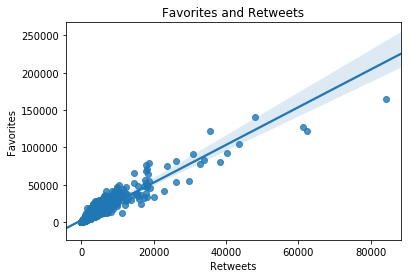

In [94]:
g = sns.regplot(x=ta_clean.retweets, y=ta_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('plot_01.png')

In [63]:
ta_clean['dog_type'].value_counts()

golden_retriever                  157
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Staffordshire_bullterrier          21
beagle                             20
Siberian_husky                     20
Shih-Tzu                           20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
kuvasz                             18
Lakeland_terrier                   18
Italian_grey

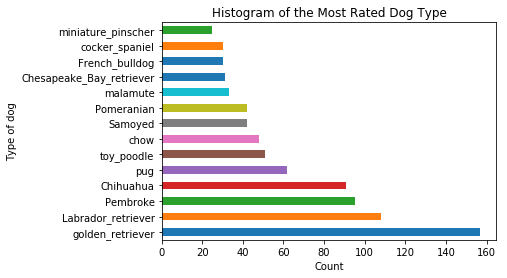

In [95]:
df_dog_type = ta_clean.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('plot_02.png',bbox_inches='tight');

In [68]:
df_dog_type_mean = ta_clean.groupby('dog_type').mean()
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,user_favourites,year,month,day,rating
dog_type,,,,,,,,,,,
Afghan_hound,8.041621e+17,9.666667,10.0,16645.0000,5671.0000,7434164.000,139632.0000,2016.333333,7.666667,11.000000,9.666667
Airedale,7.184489e+17,9.833333,10.0,5089.0000,1322.5000,7434161.000,139632.0000,2015.583333,8.750000,15.916667,9.833333
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,9033.9375,2191.6875,7434203.375,139632.0625,2016.187500,5.250000,15.000000,10.312500
Appenzeller,7.939334e+17,11.000000,10.0,7070.0000,1380.5000,7434172.500,139632.0000,2016.500000,4.500000,18.500000,11.000000
Australian_terrier,7.785921e+17,11.500000,10.0,10731.5000,2919.5000,7434173.000,139632.0000,2016.500000,3.500000,7.000000,11.500000


In [69]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
soft-coated_wheaten_terrier     8.800000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.333333
Boston_bull                     9.416667
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
miniature_schnauzer             9.600000
Norwich_terrier                 9.600000
redbone                         9.666667
Afghan_hound                    9.666667
Maltese_dog                     9.736842
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Airedale                        9.833333
Mexican_hairless                9.857143
Newfoundland                    9.857143
Saint_Bernard                   9.857143
English_setter                  9.875000
miniature_poodle                9.875000
Brabancon_griffon              10.000000
groenendael                    10.000000
Italian

In [70]:
df_dog_type_count = ta_clean.groupby('dog_type').count()
df_dog_type_count

,tweet_id,source,text,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,user_favourites,jpg_url,dog_stage,year,month,day,rating,confidence_list
dog_type,,,,,,,,,,,,,,,,,
Afghan_hound,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Blenheim_spaniel,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Border_collie,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [71]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       9.666667
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.142857
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.549451
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.875000
English_springer                  10.500000
EntleBucher                       11.000000
Eskimo_dog             

In [72]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,3,9.666667
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


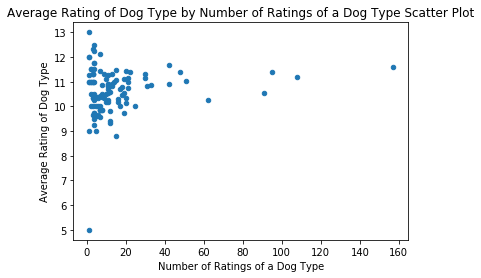

In [96]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('plot_03.png',bbox_inches='tight');

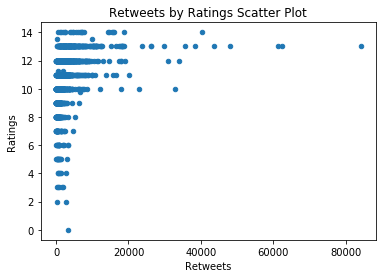

In [97]:
ta_clean.plot(x='retweets', y='rating', kind='scatter')
plt.xlabel('Retweets')
plt.ylabel('Ratings')
plt.title('Retweets by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('plot_04.png',bbox_inches='tight');

## Sources of Inspiration

**https://www.digitalocean.com/community/tutorials/how-to-create-a-twitter-app**

**https://codeburst.io/overview-of-python-data-visualization-tools-e32e1f716d10**